### Problem 1

In this problem we compare a trend stationary (TS) process and random walk with drift (RW-D).  
It serves as a useful preparation toward understanding the unit root test with Approach \#3 in Problem-2 and Problem-3.  
  
Generate a TS process:  
$y_t = 1 + t + \epsilon_t$, where  $\epsilon_t \sim \text{i.i.d} \ N(0, 1)$  
  
and RW-D:  
$y_t = 1 + y_{t−1} + \eta t$, where  $y_0 = 0$,   $\eta_t  \sim \text{i.i.d.} N(0, 0.5) $  
with sample size $n \in {100, 500, 1000}$.  
  
(a) Draw time series plots of the sample paths of the TS and RW-D for each $n \in {100, 500, 1000}.$
(Instruction: You are supposed to draw six panels in total. Fix the x-axis to be [1, n]
and the y-axis to be [0, n] for all panels for a clear comparison.)

In [484]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 
import math 
import seaborn as sns

In [485]:
n=100
epsilon_ts=np.random.randn(n)
epsilon_rwd= np.random.normal(0, math.sqrt(0.5),n).reshape(n,-1)
t=np.arange(1,n+1).reshape(n,-1)  # t starts from one
y_ts_100=[]
y_rwd_100=[]
y_ts_100.append(1+epsilon_ts[0])
y_rwd_100.append(1+epsilon_rwd[0])
for t in np.arange(1,n):
    y_ts_100.append(1+t+epsilon_ts[t])
    y_rwd_100.append(1+y_rwd_100[t-1]+epsilon_rwd[t])   # len(y)  :100  

In [486]:
n=500
epsilon_ts=np.random.randn(n)
epsilon_rwd= np.random.normal(0, math.sqrt(0.5),n).reshape(n,-1)
t=np.arange(1,n+1).reshape(n,-1)   
y_ts_500=[]
y_rwd_500=[]
y_ts_500.append(1+epsilon_ts[0])
y_rwd_500.append(1+epsilon_rwd[0])
for t in np.arange(1,n):
    y_ts_500.append(1+t+epsilon_ts[t])
    y_rwd_500.append(1+y_rwd_500[t-1]+epsilon_rwd[t])  

In [487]:
n=1000
epsilon_ts=np.random.randn(n)
epsilon_rwd= np.random.normal(0, math.sqrt(0.5),n).reshape(n,-1)
t=np.arange(1,n+1).reshape(n,-1)
y_ts_1000=[]
y_rwd_1000=[]
y_ts_1000.append(1+epsilon_ts[0])
y_rwd_1000.append(1+epsilon_rwd[0])
for t in np.arange(1,n):
    y_ts_1000.append(1+t+epsilon_ts[t])
    y_rwd_1000.append(1+y_rwd_1000[t-1]+epsilon_rwd[t])  

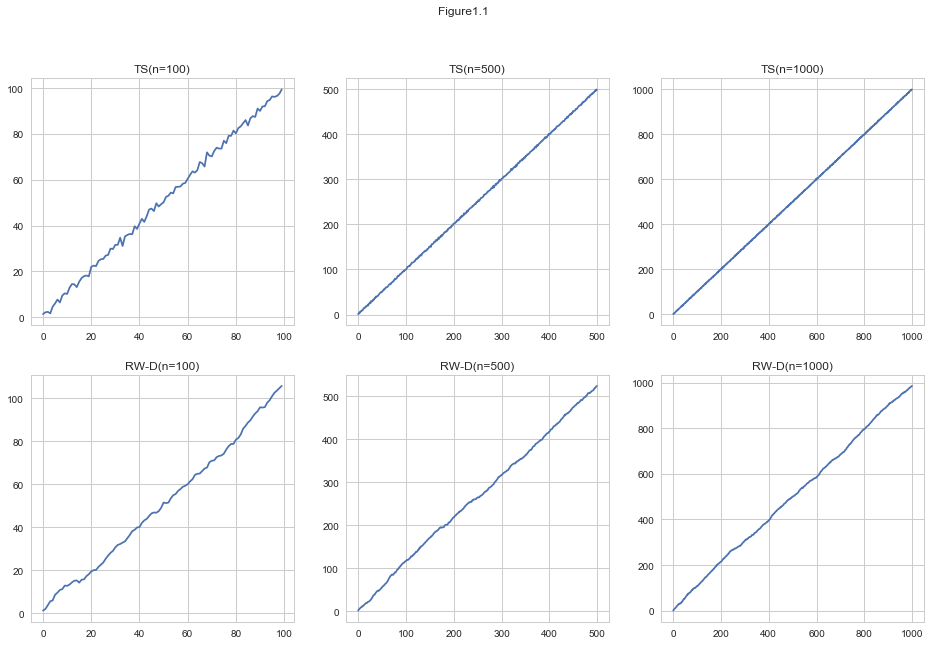

In [493]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,10))

plt.subplot(231); plt.plot(y_ts_100); plt.title('TS(n=100)')
plt.subplot(232); plt.plot(y_ts_500); plt.title('TS(n=500)')
plt.subplot(233); plt.plot(y_ts_1000); plt.title('TS(n=1000)')
plt.subplot(234); plt.plot(y_rwd_100); plt.title('RW-D(n=100)')
plt.subplot(235); plt.plot(y_rwd_500); plt.title('RW-D(n=500)')
plt.subplot(236); plt.plot(y_rwd_1000); plt.title('RW-D(n=1000)')

plt.suptitle('Figure1.1')
plt.savefig('assign2_prob1a')
plt.show()

### Problem 3

In this problem we run Monte Carlo simulations on the unit root test with Approach \#3.  
Suppose that a true DGP is
$$y_t = \alpha_0 + \phi_0 y_{t−1} + \epsilon_t, \  \text{where}, \epsilon_t \sim \text{i.i.d.} \ N(0,1) $$
with $\alpha_0 \in \{0.1, 0.5, 1, 10\}, \phi_0 \in \{1, 0.99, 0.95, 0.90\}$, and sample size $ n \in \{100, 500, 1000\}$.  

The procedure of the Monte Carlo simulations is as follows.
* Step 1: Simulate {$y_t$} from DGP.
* Step 2:  Run OLS for a regression model $y_t = \alpha_0 + \phi_0 y_{t−1} + u_t$  and compute the test statistic $U_n$.
* Step 3 Repeat Steps 1 and 2 J = 10000 times.
Based on the set of test statistics, $\{U^{(1)}_n , . . . , U_n^{(J)}\}$, answer the questions below.

(a) Fixing $\phi_0 = 1$, draw histograms of $\{U^{(1)}_n , . . . , U_n^{(J)}\}$ for each $\alpha_0 \in \{0.1, 0.5, 1, 10\}$ and$ n \in \{100, 500, 1000\}$. (Instruction: You are supposed to draw 12 panels since there are
4 values for $\alpha_0$ and 3 values for $n$.   
Fix the x-axis to be [−10, 5] and the y-axis to be [0, 0.5] across all 12 panels for a clear comparison.  
(Instruction: Add the probability density function of the standard normal distribution on each of the 12 panels for an
easier comparison between the empirical and asymptotic distributions.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import scipy

/Users/yoshikinakajima/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Each list is named after this table (test_stat_list x for x in 1~48)  
List 1-12 are the combinations of n and alpha, under phi=1.   
List 13-24, 25-36, 37-48 for phi=0.99, 0.95 and 0.9, respectively

|   $\phi =1$   | n=100  | n=500  | n=1000 |
|---------------------|--------|--------|--------|
| $\alpha=0.1$ | List1  | List2  | List3  |
| $\alpha=0.5$ | List4  | List5  | List6  |
| $\alpha=1$   | List7  | List8  | List9  |
| $\alpha=10$  | List10 | List11 | List12 |

In [428]:
J=10000
n=100  # change here according to the table
alpha=0.1  # change here according to the table
phi=1  # change here according to the table
empty_list=[]
test_stat_list1=empty_list  # change here according to the table
for i in np.arange(J):
    epsilon=np.random.randn(n).reshape(n,-1)
    y=[]
    y_lag=[]
    y.append(alpha+epsilon[0]) 
    for t in np.arange(1,n):
        y.append(alpha+phi*y[t-1]+epsilon[t])  # y_1
    for i in np.arange(0,n-1):
        y_lag.append(y[i])
    y=y[1:n]
    Y_lag=sm.add_constant(y_lag)
    ols3=sm.regression.linear_model.OLS(y,Y_lag)
    results3=ols3.fit()
    alpha_hat=results3.params[0]
    phi_hat=results3.params[1]
    sigma2=results3.scale
    V=12*sigma2/(alpha_hat**2)
    test_stat=(n**(3/2)*(phi_hat-1))/(V**(1/2))
    empty_list.append(test_stat)

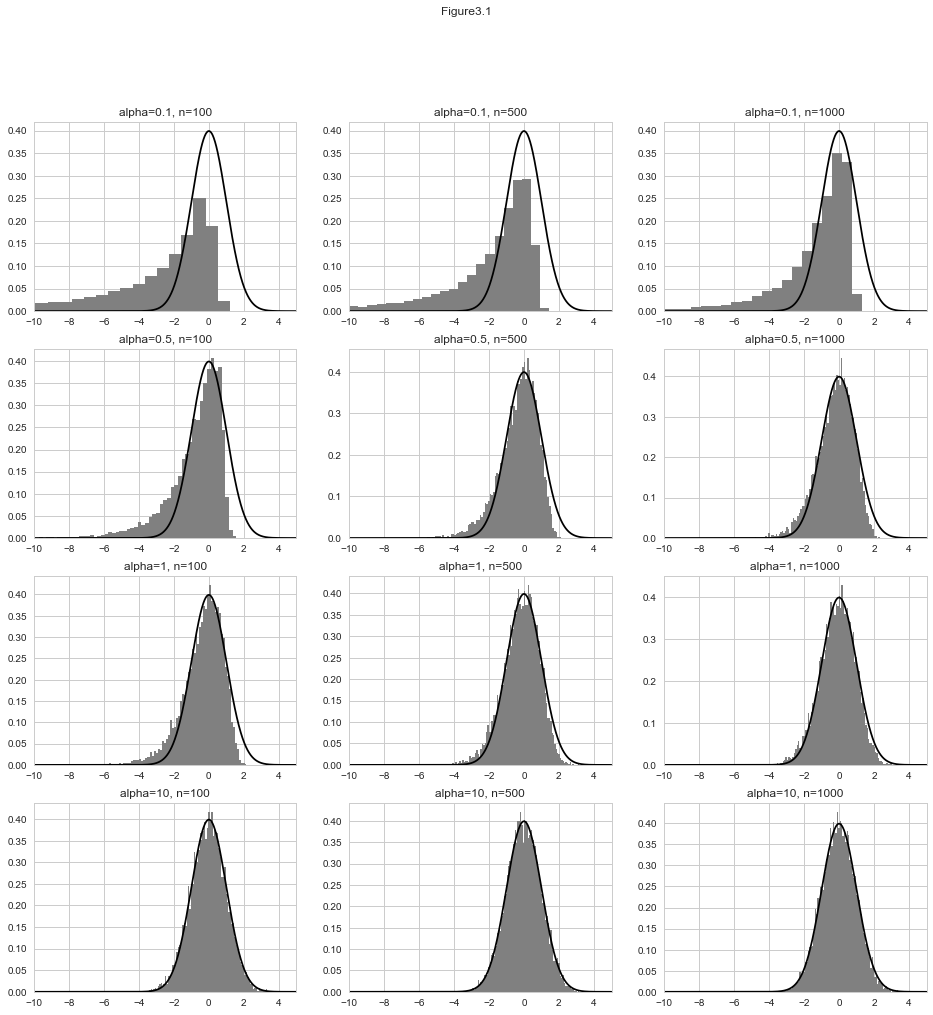

In [497]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,16))

plt.subplot(431)
plt.hist(test_stat_list1,bins=200,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=0.1, n=100')

plt.subplot(432)
plt.hist(test_stat_list2, bins=200,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=0.1, n=500')

plt.subplot(433)
plt.hist(test_stat_list3, bins=200,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=0.1, n=1000')

plt.subplot(434)
plt.hist(test_stat_list4, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=0.5, n=100')

plt.subplot(435)
plt.hist(test_stat_list5, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=0.5, n=500')

plt.subplot(436)
plt.hist(test_stat_list6, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=0.5, n=1000')

plt.subplot(437)
plt.hist(test_stat_list7, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=1, n=100')

plt.subplot(438)
plt.hist(test_stat_list8, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=1, n=500')

plt.subplot(439)
plt.hist(test_stat_list9, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=1, n=1000')

plt.subplot(4,3,10)
plt.hist(test_stat_list10, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=10, n=100')

plt.subplot(4,3,11)
plt.hist(test_stat_list11, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=10, n=500')

plt.subplot(4,3,12)
plt.hist(test_stat_list12, bins=100,normed=True,color='gray')
x_axis = np.arange(-10, 5, 0.01); plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,0,1),color='black')
plt.xlim(-10,5)
plt.title('alpha=10, n=1000')

plt.suptitle('Figure3.1')
plt.savefig('assign2_prob3')
plt.show()

Compute the empirical size and power for the critial vlaue of -1.645

In [491]:
scipy.stats.norm.ppf(0.05)

-1.6448536269514729

In [541]:
list=test_stat_list12
sum(list<scipy.stats.norm.ppf(0.05))/len(list)

0.050999999999999997